# **Explore Traffic Violation Data**

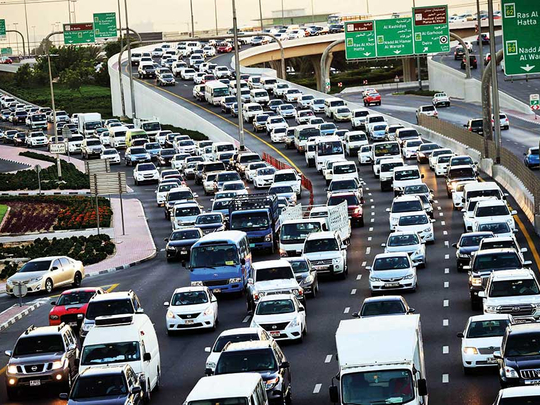

**About Dataset:**
This dataset contains around 65k+ traffic related violation records.
Attribute Information:
1. stop_date - Date of violation
2. stop_time - Time of violation
3. driver_gender - Gender of violators (Male-M, Female-F)
4. driver_age - Age of violators
5. driver_race - Race of violators
6. violation - Category of violation :
- Speeding
- Moving Violation (Reckless driving, Hit and run, Assaulting another driver, pedestrian, improper turns and lane changes etc)
- Equipment (Window tint violations, Headlight/taillights out, Loud exhaust, Cracked windshield, etc.)
- Registration/Plates
- Seat Belt
- other (Call for Service, Violation of City/Town Ordinance, Suspicious Person, Motorist Assist/Courtesy, etc.)
7. search_conducted - Whether search is conducted in True and False form
8. stop_outcome - Result of violation
9. is_arrested - Whether a person was arrested in True and False form
10. stop_duration - Detained time for violators approx (in minutes)
11. drugs_related_stop - Whether a person was involved in drugs crime (True, False)

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Loading
df = pd.read_csv('/kaggle/input/traffic-violations-dataset/traffic_violaions.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
# information About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [4]:
#calculate summary statistics 
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [5]:
#columns and raws and data
df.shape

(52966, 15)

# **Data Preprocessing**

In [6]:
# check the missing values.
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [7]:
#  country_name and search_type columns contain almost all NaN values. we have to drop these two columns.
df.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
# Drop nan values
df.dropna(subset = ['driver_gender'], inplace = True)

In [8]:
# Some missing values are to remain in the driver_age column. We have to fill these missing values using median.

df['driver_age'] = df['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))

In [9]:
# check the missing values.
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [10]:
# check the duplicate values.
df.duplicated().any()

True

In [11]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [12]:
# check the duplicate values.
df.duplicated().any()

False

**After cleaning, we again have to explore data**

In [13]:
#Choose a random sample from data
df.sample(5)

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
1843,12/2/2005,15:20,M,40.0,White,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False
52815,9/28/2011,7:33,M,52.0,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
47026,1/6/2011,19:25,M,26.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
8252,7/13/2006,8:04,M,20.0,White,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False
31279,12/23/2008,23:54,M,19.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [14]:
# information About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49411 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49411 non-null  object 
 1   stop_time           49411 non-null  object 
 2   driver_gender       49411 non-null  object 
 3   driver_age          49411 non-null  float64
 4   driver_race         49411 non-null  object 
 5   violation_raw       49411 non-null  object 
 6   violation           49411 non-null  object 
 7   search_conducted    49411 non-null  object 
 8   stop_outcome        49411 non-null  object 
 9   is_arrested         49411 non-null  object 
 10  stop_duration       49411 non-null  object 
 11  drugs_related_stop  49411 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


In [15]:
#columns and raws and data
df.shape

(49411, 12)

# **Data Analysis**

In [16]:
df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


### Age Distribution

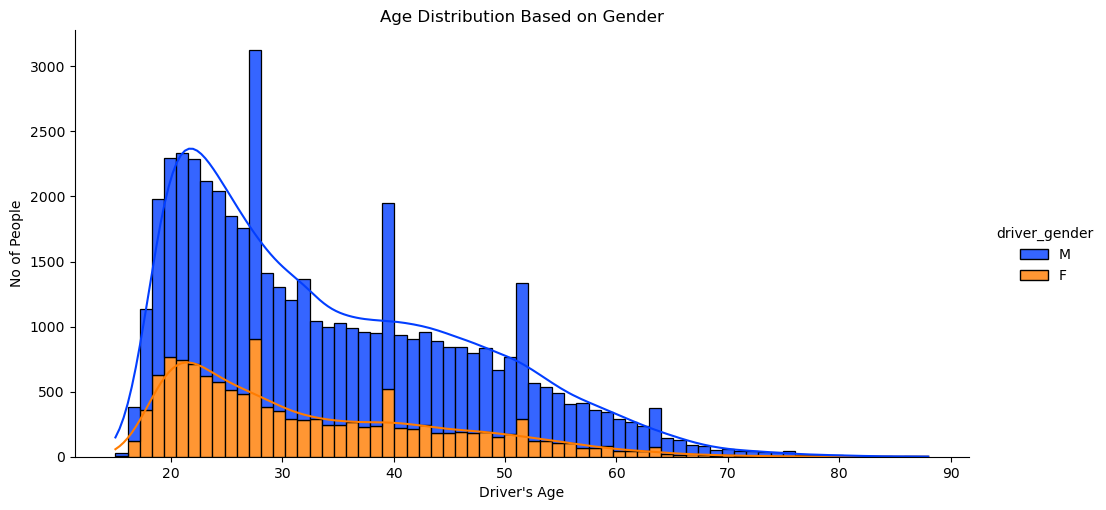

In [17]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = df, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

**We can observe it that both male and female drivers aged between 20 to 40 are doing maximum violations, while those above 16 are committing them minimally**

### Distribution in Violation Type

Text(0, 0.5, 'No. of People Involved')

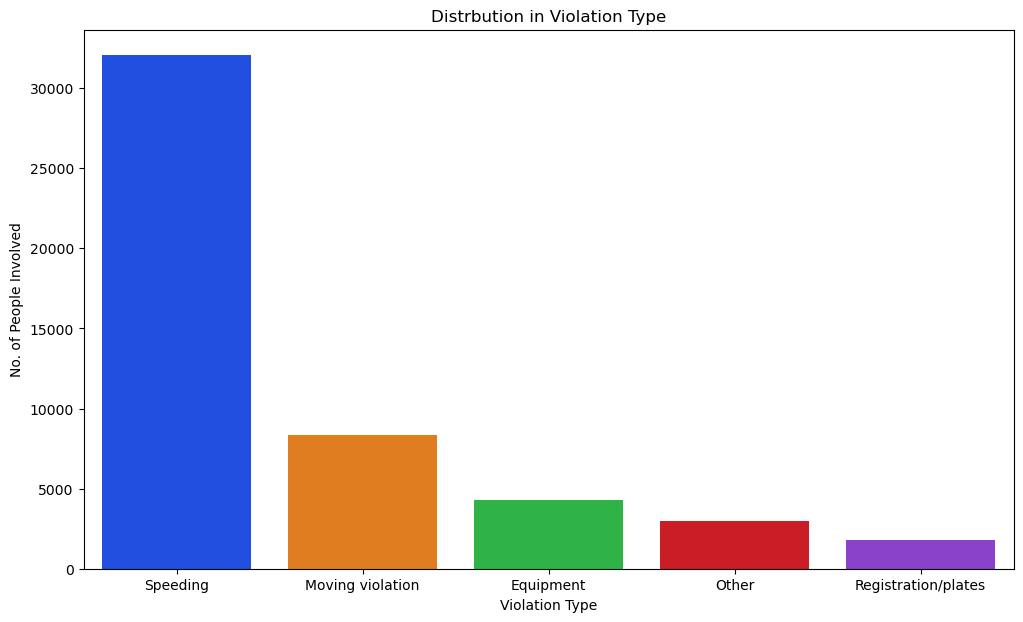

In [18]:
fig = plt.figure(figsize =(12, 7))
sns.countplot(x = df['violation'] , data = df, order = df['violation'].value_counts().index, palette = "bright")
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved")

**the traffic violations, as per this dataset, occur the most because of speeding issues**

### Traffic Violation Distribution Based on Race

Text(0, 0.5, 'No. of People')

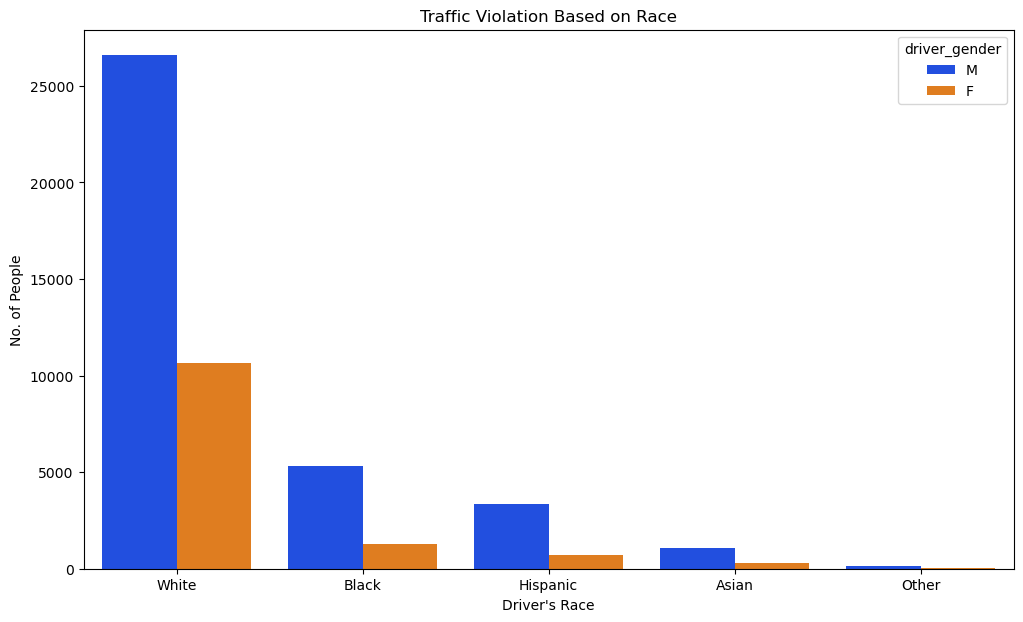

In [19]:
fig = plt.figure(figsize =(12, 7))
sns.countplot(x=df.driver_race, data=df, order = df.driver_race.value_counts().index, palette = "bright",hue = 'driver_gender')
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People")

**Among these people with white race background violate the most with a participation greater than 70% of total. A very obvious reason for this may be the population distribution among a distinct race of people**

### Correlation Heatmap

Text(95.7222222222222, 0.5, 'Violation Type')

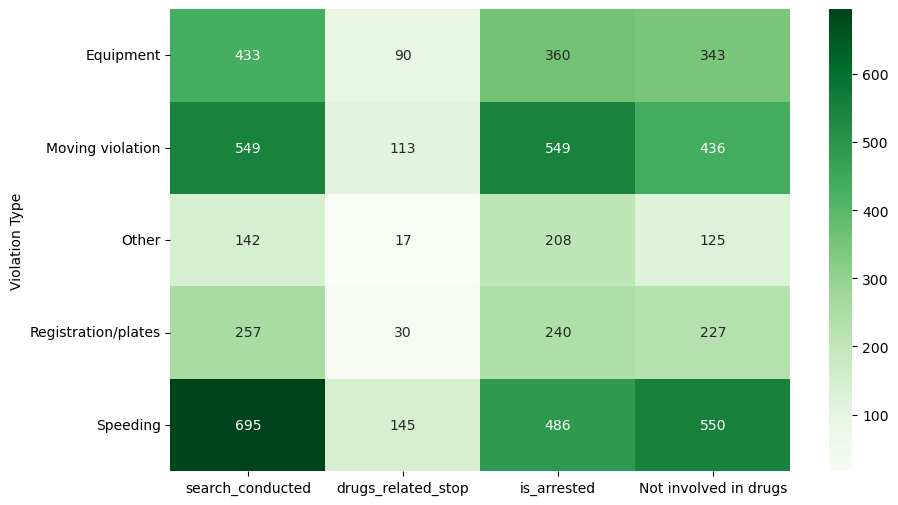

In [20]:
result = df.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (10,6))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Greens")
plt.ylabel("Violation Type")

**This figure represents dependency of ‘drug- based’ cases with searches conducted for various types of violation types or reasons. As is followed in all the violation types, most of the total searches conducted do not turn out to be of people involved in drugs**

### Gender Of People

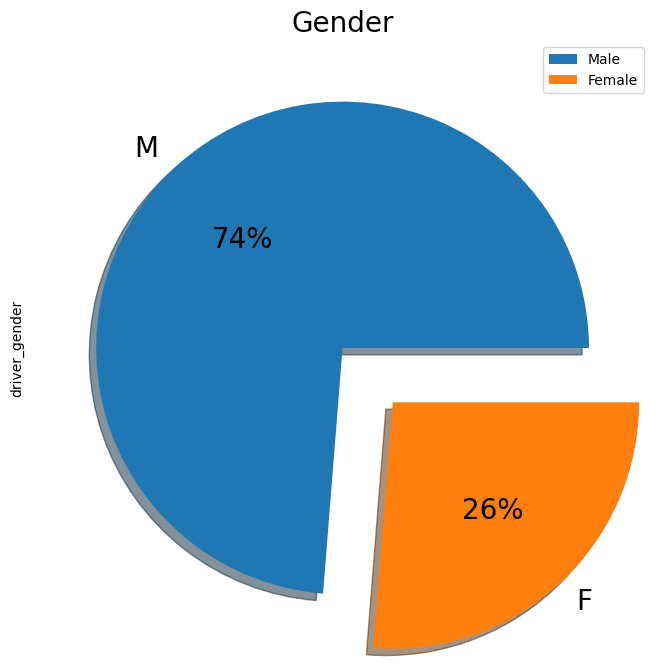

In [21]:
gender=df.driver_gender.value_counts()
gender
fig = plt.figure(figsize =(10, 8))
gender.plot(kind='pie',textprops={'fontsize': 20},
 autopct='%1.0f%%',explode=(0,0.3),shadow=True,)
plt.title('Gender' ,size=20)
plt.legend(['Male',"Female"])

### Total Search Conductes Over The Years

Text(0.5, 1.0, 'Total Search Conductes Over The Years')

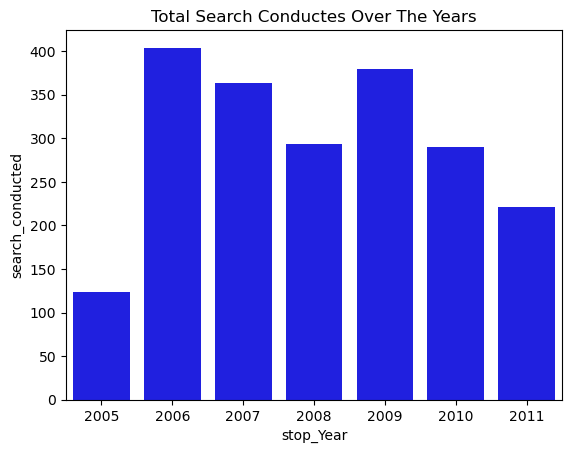

In [22]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['stop_Year'] = pd.DatetimeIndex(df['stop_date']).year
df.search_conducted = df.search_conducted.replace(to_replace=[True, False], value=[1, 0])
yearly_data = df.groupby('stop_Year').sum()
yearly_data.reset_index(inplace = True)

sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conductes",palette=['blue']).set_title("Total Search Conductes Over The Years")

# Summary



*   We can observe it that both male and female drivers aged between 20 to 40 are doing maximum violations, while those above 16 are committing them minimally

*   the traffic violations, as per this dataset, occur the most because of speeding issues



*   Among these people with white race background violate the most with a participation greater than 70% of total. A very obvious reason for this may be the population distribution among a distinct race of people


*    most of the total searches conducted do not turn out to be of people involved in drugs



*   Most of the traffic offenses are male






